In [63]:
import numpy as np # linear algebra
import tensorflow as tf
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [64]:
# import matplotlib.pyplot as plt
# img = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00301001.png')
# plt.imshow(img)

In [65]:
# img1 = plt.imread('../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
# plt.imshow(img1)

In [66]:
import glob
gen = [glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('sign_data_ver2/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [67]:
import glob
import keras
import cv2

# gen = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/*.*")
# forg = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [68]:
train_data.shape

(540, 224, 224, 3)

In [69]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [70]:
# from keras.models import Sequential
# from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
# from keras_preprocessing.image import ImageDataGenerator
# from sklearn.metrics import confusion_matrix as CM
# from keras.optimizers import Adam

# network = Sequential()

# network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
# network.add(MaxPooling2D(3,3))
# network.add(Conv2D(32,(3,3),activation='relu'))
# network.add(MaxPooling2D(2,2))
# network.add(Flatten())
# network.add(Dense(128,activation = 'relu'))
# network.add(Dropout(rate=0.3))
# network.add(Dense(2,activation = 'softmax'))

# network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
# network.summary()

In [110]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Lambda, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D, Conv2D, BatchNormalization
# from keras.layers.normalization import Normalization
from keras.regularizers import l2
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import RMSprop, Adam

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV3Large(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet'
                                               )
base_model.trainable = False
                                               
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = keras.layers.Dense(1)

network = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.001
network.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

# network.compile(optimizer=Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [111]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 10
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/10
513/513 [==============================] - 26s 41ms/step - loss: 0.7088 - accuracy: 0.4912 - val_loss: 0.7007 - val_accuracy: 0.4815
Epoch 2/10
513/513 [==============================] - 19s 37ms/step - loss: 0.7030 - accuracy: 0.5146 - val_loss: 0.6959 - val_accuracy: 0.4444
Epoch 3/10
513/513 [==============================] - 19s 37ms/step - loss: 0.6986 - accuracy: 0.5127 - val_loss: 0.7070 - val_accuracy: 0.4444
Epoch 4/10
513/513 [==============================] - 19s 37ms/step - loss: 0.6920 - accuracy: 0.5244 - val_loss: 0.6807 - val_accuracy: 0.4815
Epoch 5/10
513/513 [==============================] - 19s 36ms/step - loss: 0.6903 - accuracy: 0.5166 - val_loss: 0.6839 - val_accuracy: 0.5185
Epoch 6/10
513/513 [==============================] - 19s 36ms/step - loss: 0.6895 - accuracy: 0.5302 - val_loss: 0.6794 - val_accuracy: 0.5185
Epoch 7/10
513/513 [==============================] - 19s 36ms/step - loss: 0.6796 - accuracy: 0.5263 - val_loss: 0.6759 - val_accuracy:

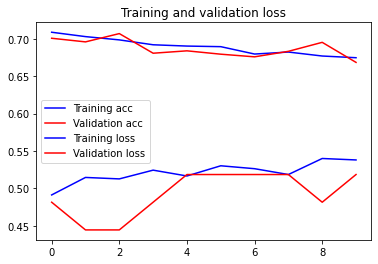

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [112]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [113]:
pred = network.predict(test_data)

6/6 [==============================] - 5s 628ms/step


In [114]:
pred  #prob of genuine, prob of forged

array([[ 0.19592063],
       [ 1.1973462 ],
       [ 0.82441574],
       [-0.20945498],
       [ 0.5351126 ],
       [ 0.08830432],
       [ 0.848257  ],
       [ 0.88035345],
       [ 0.18268053],
       [ 0.9464711 ],
       [ 0.16930468],
       [ 0.7385676 ],
       [ 0.17001323],
       [-0.05199563],
       [ 0.06516763],
       [-0.23012094],
       [ 0.69418716],
       [ 0.19095503],
       [ 0.8503687 ],
       [ 0.29589096],
       [-0.40513065],
       [-0.56262237],
       [ 1.3762779 ],
       [ 0.00251205],
       [-0.00673627],
       [ 1.4305849 ],
       [-0.4716469 ],
       [ 0.66610944],
       [ 0.8823452 ],
       [ 0.97207403],
       [-0.2309872 ],
       [ 0.13394836],
       [ 0.4668216 ],
       [-0.45013583],
       [ 0.14711408],
       [ 0.41323057],
       [ 1.27983   ],
       [ 0.31057096],
       [-0.47211003],
       [ 0.13378163],
       [ 1.5881444 ],
       [-0.8428122 ],
       [-0.2915334 ],
       [ 0.6842942 ],
       [ 0.82089794],
       [ 0

In [117]:
test_loss, test_acc = network.evaluate(test_data, test_labels, verbose=1) 
print("Test Accuracy:", test_acc)

6/6 [==============================] - 4s 638ms/step - loss: 0.6185 - accuracy: 0.7056
Test Accuracy: 0.7055555582046509


In [116]:
# network.save("ver2_mobilenetv2.h5")